In [1]:
from ecb_analyst import ECBInterventions
from portfolio_analyst import TickerAnalyst
import pandas as pd
import plotly.express as px
from utils import Dateconvert

In [73]:
ticker = TickerAnalyst("TNOW.L",multi_ticker=False)
hist = ticker.get_history()
rets = ticker.get_returns()
rets_q = ticker.get_returns('q').drop(columns='Close_cumul')

In [3]:
ecb = ECBInterventions(['APP_breakdown_history.csv','tops_ltro.csv',
                   'tops_ot.csv','tops_mro.csv'])
appdiff = ecb.get_app_netdiff()
app_vol = ecb.get_app_volume()
omo = ecb.get_omo_trends()
omo_pct = ecb.get_omo_pctchng()

In [74]:
indx = Dateconvert(rets_q.index).to_year_month()
rets_q.index = indx

In [75]:
rets_q[rets_q.index>'2014-October'].dropna()

,Close_Q_ret
2014-September,0.037946
2015-March,0.010763
2015-June,-0.011154
2015-September,-0.055280
2015-December,0.109014
2016-March,-0.006191
2016-June,-0.032592
2016-September,0.134568
2016-December,0.011128
2017-March,0.111661


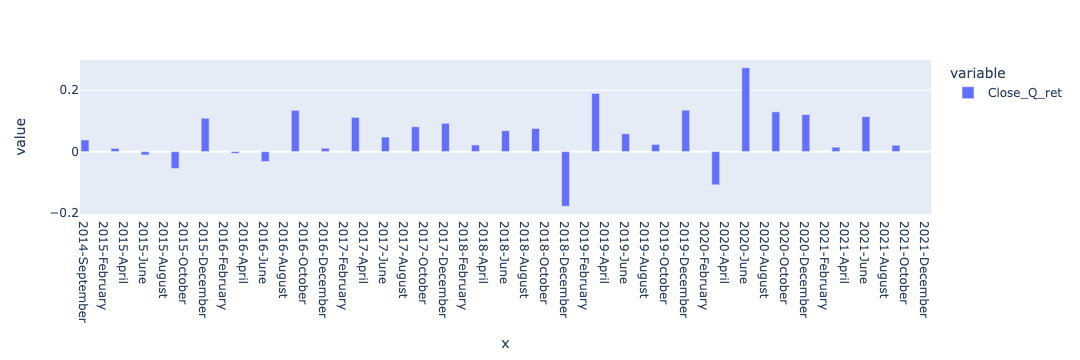

In [76]:
fig = px.bar(rets_q[rets_q.index>'2014-October'], x=rets_q[rets_q.index>'2014-October'].index, y=['Close_Q_ret'])

fig.show()

In [77]:
df=pd.DataFrame({'vol':appdiff[1],'prog':appdiff[2]},index=pd.DatetimeIndex(appdiff[0]))

In [78]:
appdf = pd.DataFrame(df['vol'].groupby(by=df.index).sum()).resample('Q').ffill() #.reset_index().set_index('Date')
indx = Dateconvert(appdf.index).to_year_month()
appdf.index = indx

In [79]:
appdf

,vol
2014-December,13013.0
2015-March,109733.0
2015-June,61580.0
2015-September,71094.0
2015-December,33313.0
2016-March,54328.0
2016-June,77686.0
2016-September,100252.0
2016-December,25092.0
2017-March,67798.0


In [101]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

corr = pd.concat([appdf, rets_q[rets_q.index>'2014-October'].dropna()],axis=1).dropna().astype('float')

corr.corr()#method=histogram_intersection)

,vol,Close_Q_ret
vol,1.00000,-0.19167
Close_Q_ret,-0.19167,1.00000
